In [1]:
import numpy as np

In [2]:
class Perceptron(object):
    """
        Klasyfikator - perceptron

        Parametry
        ---------
        eta: zmiennoprzecinkowy
            Współczynnik uczenia się (0.0 - 1.0)
        n_iter: liczba całkowita
            liczba epoch
        random_state: liczba całkowita
            ziarno generatora

        Atrybuty
        -------
        w_ : jednowymiarowa tablica
            wagi po dopasowaniu
        errors_ : lista
            liczba nieprawidłowych klasyfikacji w każdym epoch

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        dopasowanie danych uczących

        Parametry
        --------
        X: tablicopodobny, wymiary = [l_probek, l_cech]
            wektory uczace
        y: tablicopodobny, wymiary = [l_probek]
            wartości docelowe
        zwraca
        -----
        self: objekt
        """
        rgen = np.random.RandomState(self.random_state)
        #rozkład normalny - środek rozkładu, rozkład, rozmiar
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1+X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                #zwiększ o jeden jeśli update nie jest 0.0
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """
        Oblicz całkowite pobudzenie
        """
        #Transponowane X * wagi - dot
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """
        Zwróć etykietę po obliczeniu funkcji skoku jednostkowego
        """
        # nadawanie 1 i -1
        return np.where(self.net_input(X) >= 0.0, 1, -1)


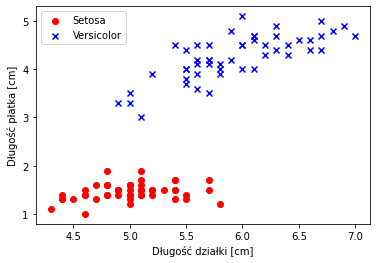

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
#dane są posegregowane 
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
     header=None)

#wybieramy 2 odmiany i zamieniamy je na 1 i -1
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#tu wybieramy działki i długość płatka
X = df.iloc[0:100, [0, 2]].values

#generujemy wykres danych

plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Długość działki [cm]')
plt.ylabel('Długość płatka [cm]')
plt.legend(loc='upper left')
plt.show()

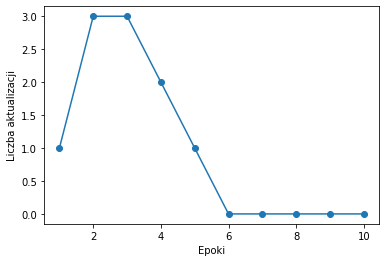

In [4]:
#wykres z logami błędów w każdym z epoch
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoki')
plt.ylabel('Liczba aktualizacji')
plt.show()

In [26]:
# zobaczymy jak wygląda granica przebiegająca między etykietami
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    #konfiguracja generatora znaczników i mapy kolorów

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #wykresy powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #narysuj wykres z próbkami

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=colors[idx],
            marker=markers[idx], label=cl,
            edgecolor='black')


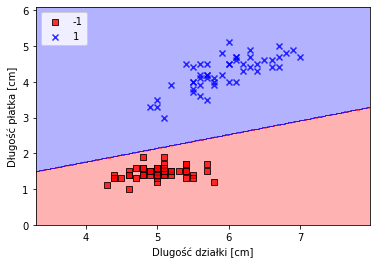

In [27]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('Dlugość działki [cm]')
plt.ylabel('Długość płatka [cm]')
plt.legend(loc='upper left')
plt.show()